<a href="https://colab.research.google.com/github/go4amol/OmanCovidInfo/blob/master/nama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas folium matplotlib shapely

In [5]:
import geopandas as gpd

# Load pipeline data and water leakage points
pipeline_gdf = gpd.read_file('/content/pipeline.shp')
leakage_gdf = gpd.read_file('/content/leakage.shp')

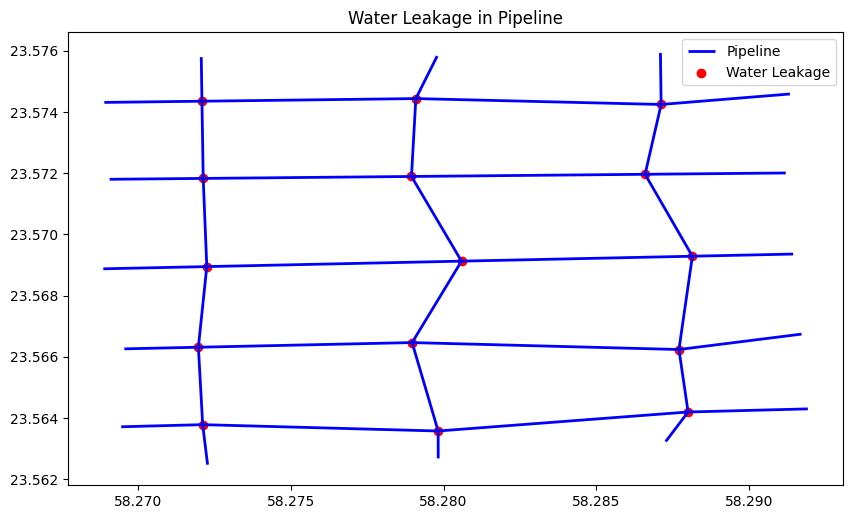

In [6]:
import matplotlib.pyplot as plt

# Plot the pipeline and leakage points
fig, ax = plt.subplots(figsize=(10, 10))
pipeline_gdf.plot(ax=ax, color='blue', linewidth=2, label='Pipeline')
leakage_gdf.plot(ax=ax, color='red', marker='o', label='Water Leakage')

# Customize plot
plt.title('Water Leakage in Pipeline')
plt.legend()
plt.show()


In [7]:
import folium

# Get the center of the map (based on the pipeline)
center = pipeline_gdf.geometry.centroid.iloc[0].coords[0][::-1]  # lat, lon

# Create a folium map centered on the pipeline
m = folium.Map(location=center, zoom_start=12)

# Add pipeline to the map
for _, row in pipeline_gdf.iterrows():
    folium.PolyLine(locations=[(y, x) for x, y in row.geometry.coords], color='blue', weight=3).add_to(m)

# Add leakage points to the map
for _, row in leakage_gdf.iterrows():
    folium.Marker(location=[row.geometry.y, row.geometry.x], popup="Leakage", icon=folium.Icon(color='red')).add_to(m)

# Save the map as an HTML file
m.save('pipeline_leakage_map.html')

# Display map in notebook or browser (optional)
m


In [9]:
# Assuming leakage_gdf has a 'severity' column with values like 'low', 'medium', 'high'
for _, row in leakage_gdf.iterrows():
    severity = row['severity']
    if severity == 'Low':
        color = 'green'
    elif severity == 'Medium':
        color = 'orange'
    else:
        color = 'red'

    folium.Marker(location=[row.geometry.y, row.geometry.x],
                  popup=f"Leakage: {severity}",
                  icon=folium.Icon(color=color)).add_to(m)

# Save the enhanced map
#m.save('pipeline_leakage_severity_map.html')
m


<ipython-input-10-8f1947341716>:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  leakage_near_pipeline = leakage_gdf[leakage_gdf.geometry.within(pipeline_buffer.unary_union)]


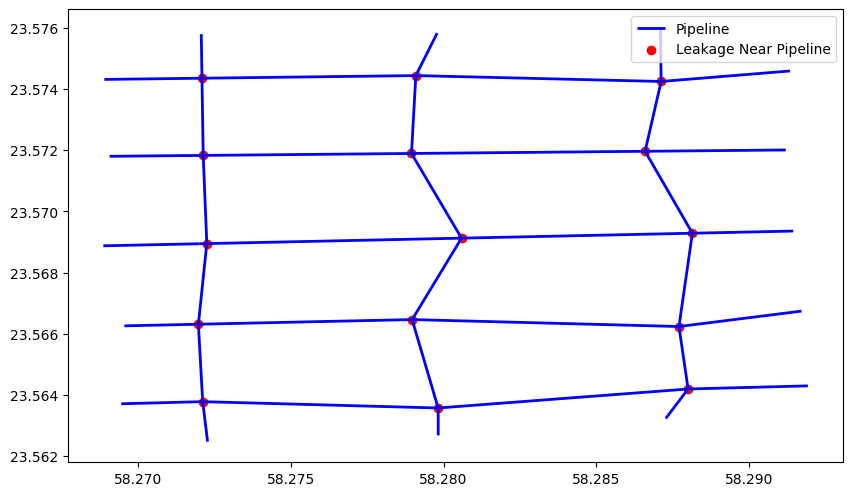

In [10]:
from shapely.geometry import Point

# Buffer the pipeline to find leakage points within a specific distance (e.g., 100 meters)
pipeline_buffer = pipeline_gdf.buffer(100)  # 100 meters buffer
leakage_near_pipeline = leakage_gdf[leakage_gdf.geometry.within(pipeline_buffer.unary_union)]

# Visualize the filtered leakages
fig, ax = plt.subplots(figsize=(10, 10))
pipeline_gdf.plot(ax=ax, color='blue', linewidth=2, label='Pipeline')
leakage_near_pipeline.plot(ax=ax, color='red', marker='o', label='Leakage Near Pipeline')
plt.legend()
plt.show()
